<a href="https://colab.research.google.com/github/HeatherAnnFoster/Spanish-Wine-Car-Insurance/blob/main/Spanish_Wine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv('/content/Project 2.A.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


#**Source of Data**

Kaggle.com

#**Brief Description of the Data**

Context

This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

Content

The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. The was collected by me using web scraping from different sources (from wine specialized pages to supermarkets).

#**Target**

There are two possible targets for this dataset.  I will be looking at the quality of the wine of the Rating column for my target.

#**What does one row represent? (A person? A business? An event? A product?)**

The Winery, Year, Country, and Region represents the business or winery that the wine was produced in.  The Wine, Type, Body, and Acidity represents the wine itself or the product.  The Rating, Number of Reviews, and Price represent the sellability of the wine which would also be tied to the business aspect of the dataset.

#**Is this a classification or regression problem?**

Because the target is from the rating column, it is an ordinal column.  The values are 0 to 5, set up as 5 being the best and 0 being the worst.  For this column, I would use an ordinal transformer while I am analyzing this dataset.  It is classification model.

#**How many features does the data have?**

There are 11 features.

In [216]:
df.shape

(7500, 11)

#**How many rows are in the dataset?**

There are 7,500 rows.

#**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

I foresee duplicates, missing data and needing multiple preprocessors for various models on different columns.  I also think I will have multiple visualizations to see and show what different columns would look like when compared to others.  This might help determine what I need to tune later.

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [218]:
df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

#Duplicated Values
There are 5,452 duplicated rows.  They will be dropped within the next few boxes.

In [219]:
df.duplicated().sum()

5452

In [220]:
df.loc[df.duplicated()]

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
1800,Bodega Tameran,Marmajuelo,2020,4.3,27,Espana,Gran Canaria,29.75,NaN,NaN,NaN
2036,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95,NaN,NaN,NaN
2039,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN
2050,La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.50,Rioja Red,4.0,3.0
2051,Enrique Mendoza,Santa Rosa,2017,4.2,420,Espana,Alicante,18.90,Red,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


The duplicates are dropped now.

In [221]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [222]:
df.describe(include = 'number')

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


#Inconsistent Data

Below is a look at all the values of the data.  There are no inconsistencies of categorical data in this set.

In [223]:
df.value_counts()

winery                            wine                                year  rating  num_reviews  country  region    price      type         body  acidity
AGE                               Fuenmayor Gran Reserva              1959  4.3     29           Espana   Rioja     230.00000  Rioja Red    4.0   3.0        1
Navajas                           Mirador de Navajas Reserva Rioja    2011  4.3     29           Espana   Rioja     28.75501   Rioja Red    4.0   3.0        1
Orben                             Malpuesto                           2018  4.4     158          Espana   Rioja     35.50000   Rioja Red    4.0   3.0        1
                                                                      2017  4.3     239          Espana   Rioja     30.30000   Rioja Red    4.0   3.0        1
Ontanon                           Queiron Reserva Vinedos Familiares  2011  4.4     74           Espana   Rioja     26.85000   Rioja Red    4.0   3.0        1
                                                   

In [224]:
df['winery'].value_counts()
print(df['winery'].unique())

['Teso La Monja' 'Artadi' 'Vega Sicilia' 'Pago de Carraovejas'
 'Toro Albala' 'Bodegas El Nido' 'Valdespino' 'Dominio de Pingus'
 'Alvaro Palacios' 'Ordonez' 'Bodegas Valduero' 'Vina Sastre'
 'Sierra Cantabria' 'Descendientes de J. Palacios' 'La Rioja Alta'
 'Marques de Murrieta' 'Vinedos de Paganos' 'Emilio Moro'
 'Quinta de la Quietud' 'Bodegas Mauro' 'Bodega Contador (Benjamin Romeo)'
 'Remirez de Ganuza' 'Bodegas San Roman' 'Pago de Los Capellanes'
 'Bodega Numanthia' 'Alto Moncayo' 'Mas Doix' 'Finca Moncloa'
 'Bodegas Roda' 'Martinet' 'Recaredo' 'Clos Erasmus' 'Barbadillo'
 'Gonzalez-Byass' 'Bodegas Amaren' 'Alvear' 'Equipo Navazos' 'Morca'
 'Territorio Luthier' 'Rafael Palacios' 'Terra Remota'
 'Dehesa de Los Canonigos' 'Miguel Merino' 'Gutierrez de la Vega' 'Alion'
 'Aalto' 'Carmelo Rodero' 'Dominio del Bendito' "Mas d'en Gil"
 'Casa Castillo' 'Matarromera' 'Nin-Ortiz' 'Vinas del Vero'
 'Marques de Riscal' 'Arzuaga' 'Bodegas Mas Alta' 'Dominio de Calogia'
 'Tomas Postigo' 'Cal P

In [225]:
df['wine'].value_counts()
print(df['wine'].unique())

['Tinto' 'Vina El Pison' 'Unico' 'Unico Reserva Especial Edicion'
 'El Anejon' 'Don PX Convento Seleccion' 'Cuesta de Las Liebres' 'El Nido'
 'Toneles Moscatel' 'Pingus' 'Don PX Pedro Ximenez'
 "L'Ermita Velles Vinyes Priorat" 'Vatan Arena Tinta de Toro'
 'Ribera Del Duero Gran Reserva 12 Anos' 'Pesus Ribera del Duero' 'Magico'
 'La Faraona Bierzo (Corullon)' 'Gran Reserva 890' 'Valbuena 5o'
 'Castillo Ygay Gran Reserva Especial Blanco' 'La Nieta'
 'Malleolus de Valderramiro' 'Malleolus de Sanchomartin' 'Alabaster'
 'La Mula de la Quietud' 'Terreus Paraje de Cueva Baja' 'Contador Rioja'
 'Maria Remirez de Ganuza' 'Cartago Paraje de Pozo'
 'Parcela El Picon Tinto' 'Termanthia' 'Clon De La Familia'
 'Aquilon Garnacha' 'Quinon de Valmira' '1902 Centenary Carignan Priorat'
 'Tintilla de Rota' 'Cirsion Rioja' 'Cami Pesseroles' "Turo d'en Mota"
 'Priorat' 'Reliquia Palo Cortado Sherry' 'Anada Palo Cortado 1987'
 'Daphne Glorian Red' 'El Regollar' 'Abuelo Diego Palo Cortado'
 'La Bota 78 de O

In [226]:
df['year'].value_counts()
print(df['year'].unique())

['2013' '2018' '2009' '1999' '1996' '1998' '2010' '1995' '2015' '2011'
 '2016' '1970' '1946' '1962' '2019' '2004' 'N.V.' '1931' '1979' '2005'
 '2020' '2014' '1985' '1929' '2007' '2012' '2017' '2008' nan '2006' '2000'
 '2003' '2002' '1991' '1994' '1990' '1989' '1987' '1986' '1981' '2001'
 '1968' '1964' '1982' '1974' '1983' '1955' '1980' '1972' '1953' '1958'
 '1942' '1965' '1992' '1973' '1997' '1967' '1975' '1910' '1961' '1954'
 '1988' '1969' '1951' '1928' '1976' '1949' '2021' '1959' '1922' '1978'
 '1925']


In [227]:
df['rating'].value_counts()
print(df['rating'].unique())

[4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2]


In [228]:
df['num_reviews'].value_counts()
print(df['num_reviews'].unique())

[   58    31  1793  1705  1309  1209  1201   926   643   630   591   454
   438   417   398   372   295   250   217   211   174   172   145   139
   125   118   103    87    84    79    70    69    68    56    52    50
    40    32    28    26 12421  5266  4350  3929  3437  3164  3127  2935
  2826  2765  2480  2419  2177  1892  1199  1141   940   935   690   685
   675   593   560   543   511   476   442   425   393   347   312   308
   303   300   292   291   285   280   268   264   256   254   251   243
   240   225   220   214   205   203   196   184   173   171   137   136
   134   133   132   131   127   123   117   116   112   110   108   102
   100    94    92    89    82    80    74    72    67    65    64    63
    60    59    57    53    51    49    47    45    42    41    39    37
    35    33    30    29    27  6803  5938  5545  5116  4747  4685  4516
  3383  3239  2416  2208  1608  1363  1108  1015   936   840   790   700
   693   595   516   410   405   400   388   369   

#Dropped Column
Because this column is telling us that all the wine was made in Spain, we can drop it and not have it affect our dataset.

In [229]:
df['country'].value_counts()

Espana    2048
Name: country, dtype: int64

In [230]:
df = df.drop(columns = 'country')

In [231]:
df['region'].value_counts()
print(df['region'].unique())

['Toro' 'Vino de Espana' 'Ribera del Duero' 'Montilla-Moriles' 'Jumilla'
 'Jerez-Xeres-Sherry' 'Priorato' 'Rioja' 'Bierzo' 'Castilla y Leon'
 'Campo de Borja' 'Cadiz' 'Cava' 'Jerez Palo Cortado' 'Manzanilla'
 'Valdeorras' 'Emporda' 'Rioja Alta' 'Alicante' 'Somontano'
 'Dominio de Valdepusa' 'Ribeiro' 'Mallorca' 'Yecla' 'Cigales'
 'Utiel-Requena' 'Navarra' 'Rioja Alavesa' 'Costers del Segre'
 'Sardon de Duero' 'Malaga' 'Cataluna' 'Rueda' 'Jerez Pedro Ximenes (PX)'
 'Montsant' 'Conca de Barbera' 'Rias Baixas' 'Jerez Amontillado'
 'Tierra del Vino de Zamora' 'Penedes' 'Dehesa del Carrizal' 'Madrid'
 'Carinena' 'Condado de Huelva' 'Almansa' 'Jerez Cream' 'Valencia'
 'Sierras de Malaga' 'Ribeira Sacra' 'El Terrerazo' 'Jerez Oloroso'
 'Castilla' 'Alella' 'Pla i Llevant' 'Pla de Bages' 'Pago Calzadilla'
 'Andalucia' 'Monterrei' 'Ribera del Gallego-Cinco Villas' 'Aragon'
 'Galicia' 'La Palma' 'Binissalem-Mallorca' 'Calatayud' 'Arinzano'
 'Tarragona' 'Extremadura' 'Murcia' 'La Mancha' 'Otazu' '

In [232]:
df['price'].value_counts()
print(df['price'].unique())

[995.   313.5  324.95 ...  16.76  24.45  31.63]


In [233]:
df['type'].value_counts()
print(df['type'].unique())

['Toro Red' 'Tempranillo' 'Ribera Del Duero Red' 'Pedro Ximenez' 'Red'
 'Sherry' 'Priorat Red' 'Rioja Red' 'Rioja White' 'Grenache' nan 'Cava'
 'Verdejo' 'Syrah' 'Monastrell' 'Mencia' 'Sparkling' 'Montsant Red'
 'Albarino' 'Chardonnay' 'Cabernet Sauvignon' 'Sauvignon Blanc']


In [234]:
df['body'].value_counts()
print(df['body'].unique())

[ 5.  4.  3. nan  2.]


In [235]:
df['acidity'].value_counts()
print(df['acidity'].unique())

[ 3.  2.  1. nan]


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   region       2048 non-null   object 
 6   price        2048 non-null   float64
 7   type         1942 non-null   object 
 8   body         1777 non-null   float64
 9   acidity      1777 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 176.0+ KB


#Missing Values

I will be dropping the missing values in the year column and in the type column.  I will be adding the values in the body and acidity column.  The reason I am dropping the year and type is because it is less than 5% of the total dataset so it won't affect the data too much.  Now we have a dataset with values that are filled or dropped.

In [237]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [238]:
df.dropna(subset= ['year'], inplace=True)
df.dropna(subset= ['type'], inplace=True)
df.isna().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
region           0
price            0
type             0
body           165
acidity        165
dtype: int64

In [239]:
median_body=df['body'].median()
df['body'].fillna(median_body, inplace=True)
df.isna().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
region           0
price            0
type             0
body             0
acidity        165
dtype: int64

In [240]:
median_acidity=df['acidity'].median()
df['acidity'].fillna(median_acidity, inplace=True)
df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

#Univariate visuals for the target and all features.
Identified outliers.

Acidity and Body have some values that are not as close to each other as other values, but these are not outliers.  There aren't any here.

Text(0, 0.5, 'rating')

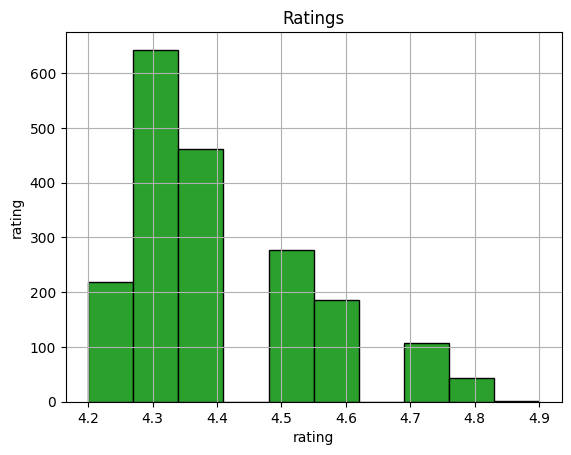

In [241]:
df['rating'].hist()
ax=df['rating'].hist()
ax=df['rating'].hist(bins = 10, edgecolor = 'black')
ax.set_title('Ratings')
ax. set_xlabel("rating")
ax.set_ylabel('rating')

Text(0, 0.5, 'wine')

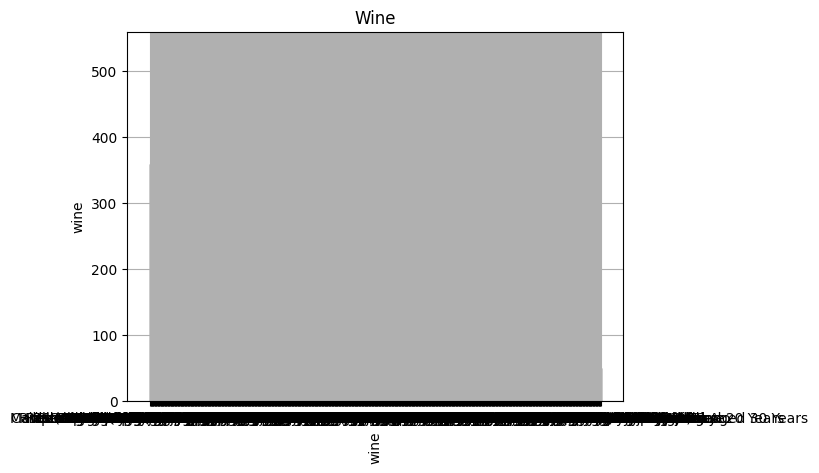

In [249]:
df['wine'].hist()
ax=df['wine'].hist()
ax=df['wine'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Wine')
ax. set_xlabel("wine", rotation = 90)
ax.set_ylabel('wine')

Text(0, 0.5, 'year')

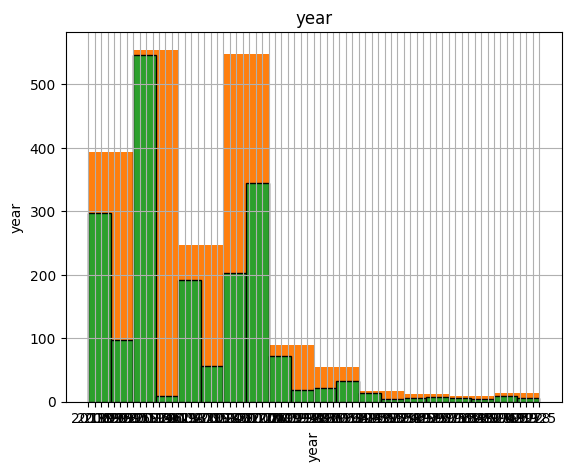

In [252]:
df['year'].hist()
ax=df['year'].hist()
ax=df['year'].hist(bins = 20, edgecolor = 'black')
ax.set_title('year')
ax. set_xlabel("year", rotation = 90)
ax.set_ylabel('year')

Text(0, 0.5, 'winery')

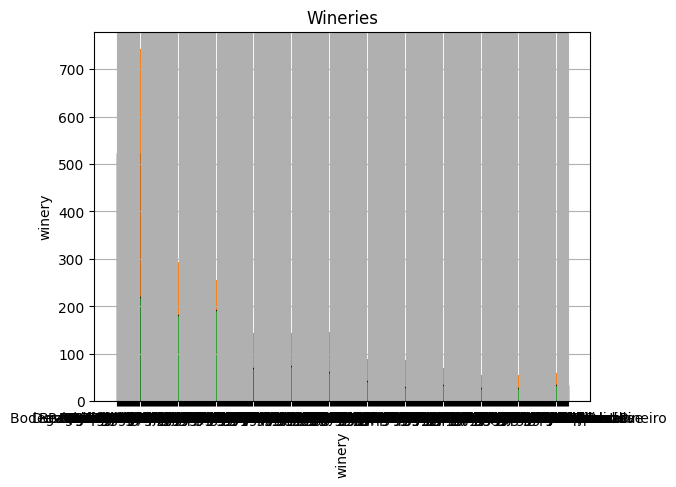

In [253]:
df['winery'].hist()
ax=df['winery'].hist()
ax=df['winery'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Wineries')
ax. set_xlabel("winery", rotation = 90)
ax.set_ylabel('winery')

Text(0, 0.5, 'num_reveiws')

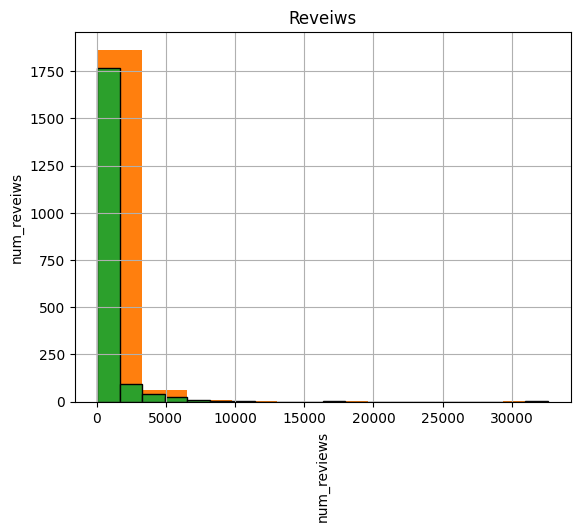

In [254]:
df['num_reviews'].hist()
ax=df['num_reviews'].hist()
ax=df['num_reviews'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Reveiws')
ax. set_xlabel("num_reviews", rotation = 90)
ax.set_ylabel('num_reveiws')

Text(0, 0.5, 'region')

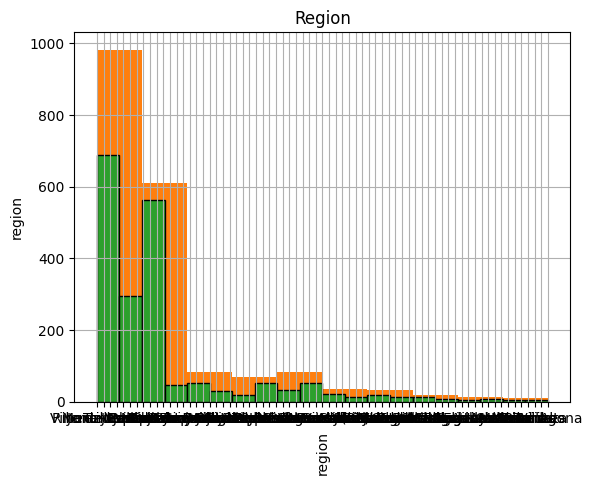

In [255]:
df['region'].hist()
ax=df['region'].hist()
ax=df['region'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Region')
ax. set_xlabel("region", rotation = 90)
ax.set_ylabel('region')

Text(0, 0.5, 'price')

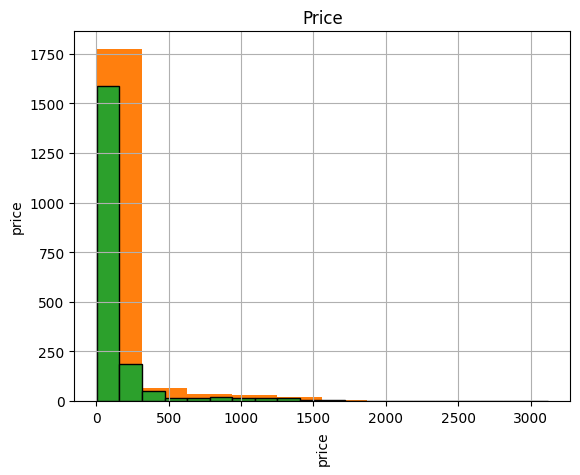

In [258]:
df['price'].hist()
ax=df['price'].hist()
ax=df['price'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Price')
ax. set_xlabel("price", rotation = 90)
ax.set_ylabel('price')

Text(0, 0.5, 'type')

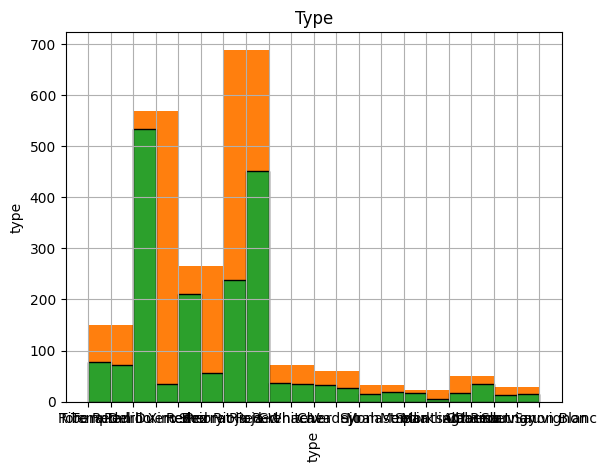

In [259]:
df['type'].hist()
ax=df['type'].hist()
ax=df['type'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Type')
ax. set_xlabel("type", rotation = 90)
ax.set_ylabel('type')

Text(0, 0.5, 'body')

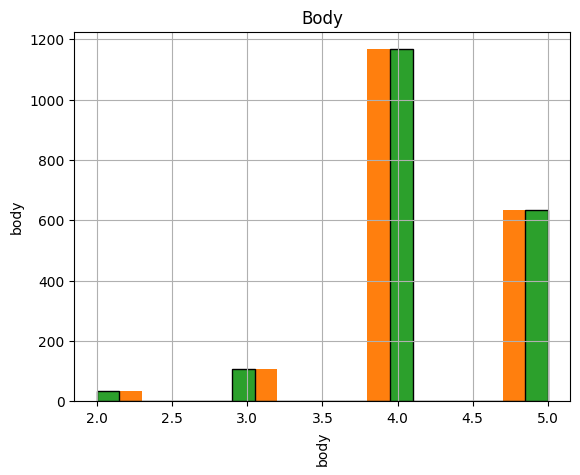

In [260]:
df['body'].hist()
ax=df['body'].hist()
ax=df['body'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Body')
ax. set_xlabel("body", rotation = 90)
ax.set_ylabel('body')

Text(0, 0.5, 'acidity')

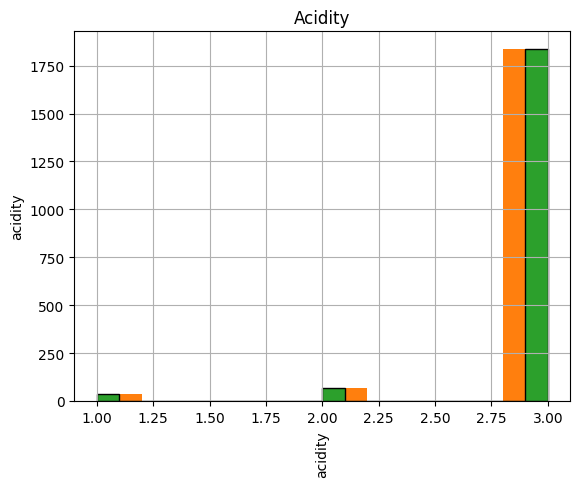

In [261]:
df['acidity'].hist()
ax=df['acidity'].hist()
ax=df['acidity'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Acidity')
ax. set_xlabel("acidity", rotation = 90)
ax.set_ylabel('acidity')